In [1]:
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
import PlotModule


### original model

In [2]:
from Model.PyTorch_CIFAR10.cifar10_models.resnet import resnet18

orig_model = resnet18(pretrained=True)
# PlotModule.plot_weight_dist_all(orig_model)

### load the model

In [3]:
folder_name = 'Resnet18_p0.6'
model_name = '/FT_0.0001_50/best_model.pth'
dir_name = os.getcwd() + '/TestRun/'
folder_path = dir_name + folder_name
ft_model = torch.load(f'{folder_path}/{model_name}', map_location="cpu")

# PlotModule.plot_weight_dist_all(new_model)

In [11]:
folder_name = 'Resnet18_p0.6'
model_name = '/FT_rev1.3_0.0001_50/best_model.pth'
dir_name = os.getcwd() + '/TestRun/'
folder_path = dir_name + folder_name
ft3_model = torch.load(f'{folder_path}/{model_name}', map_location="cpu")

## 2 model 비교

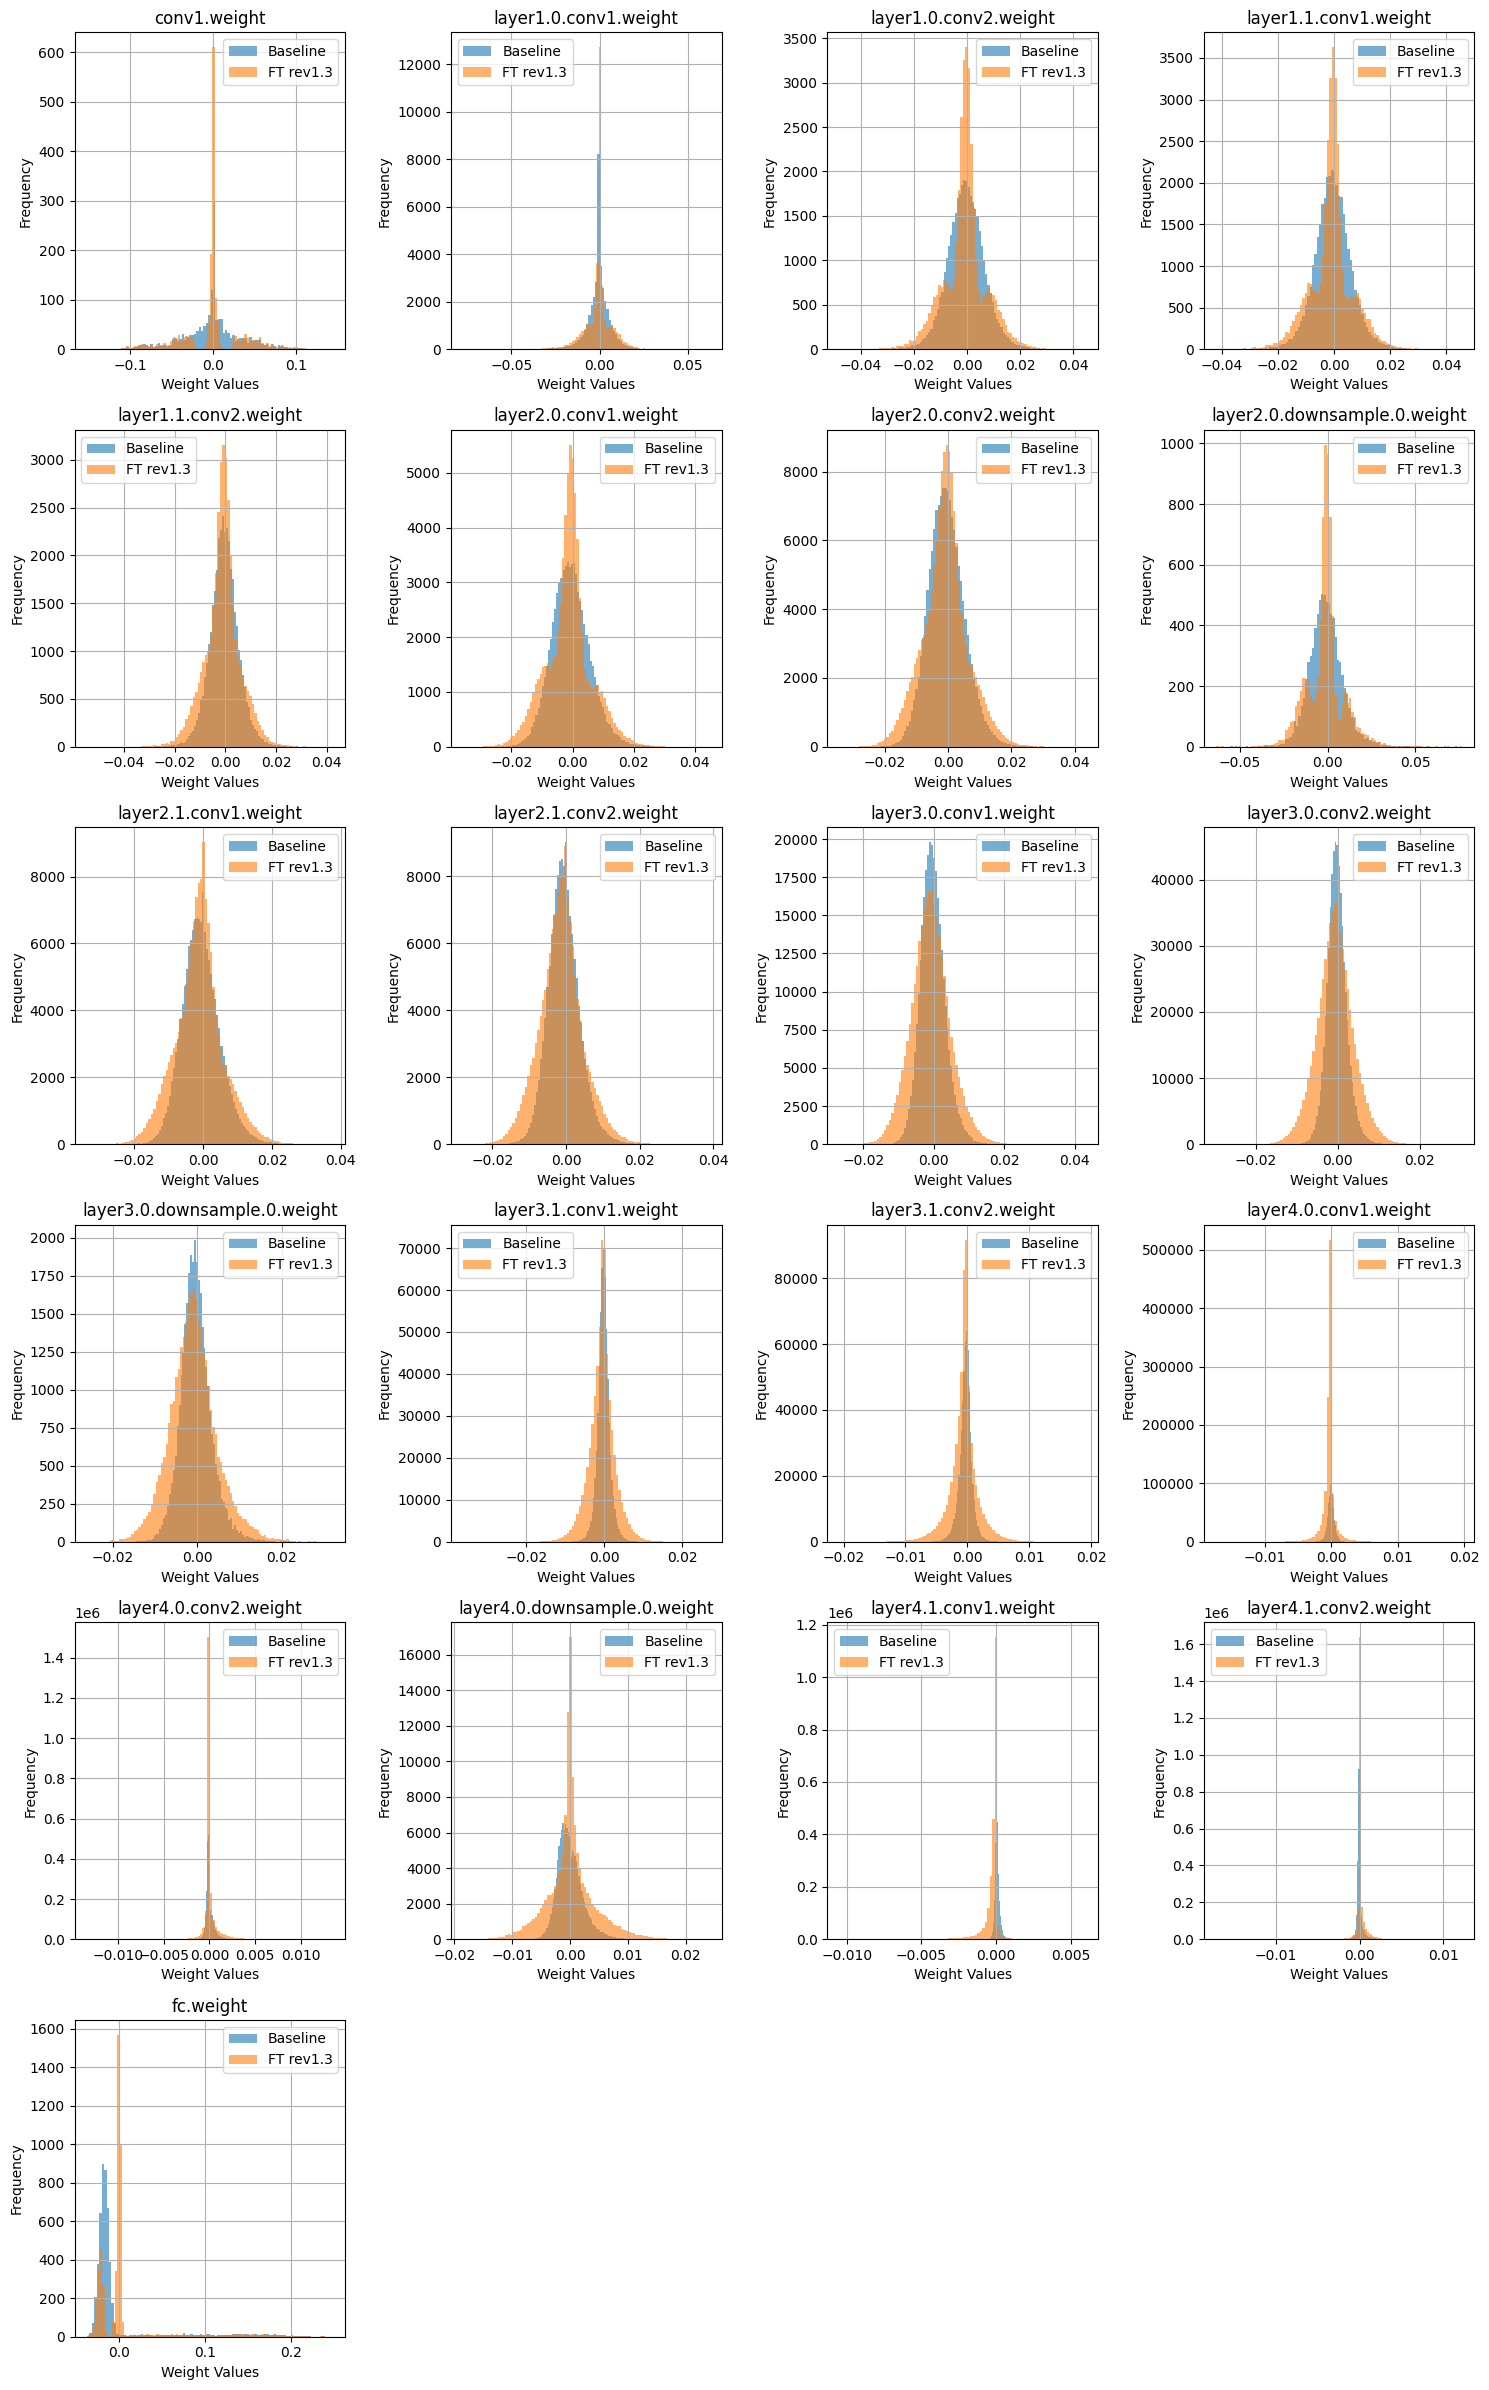

In [13]:
PlotModule.plot_weight_dist_two(
    models=[orig_model, ft3_model],
    model_names=['Baseline','FT rev1.3'],
)

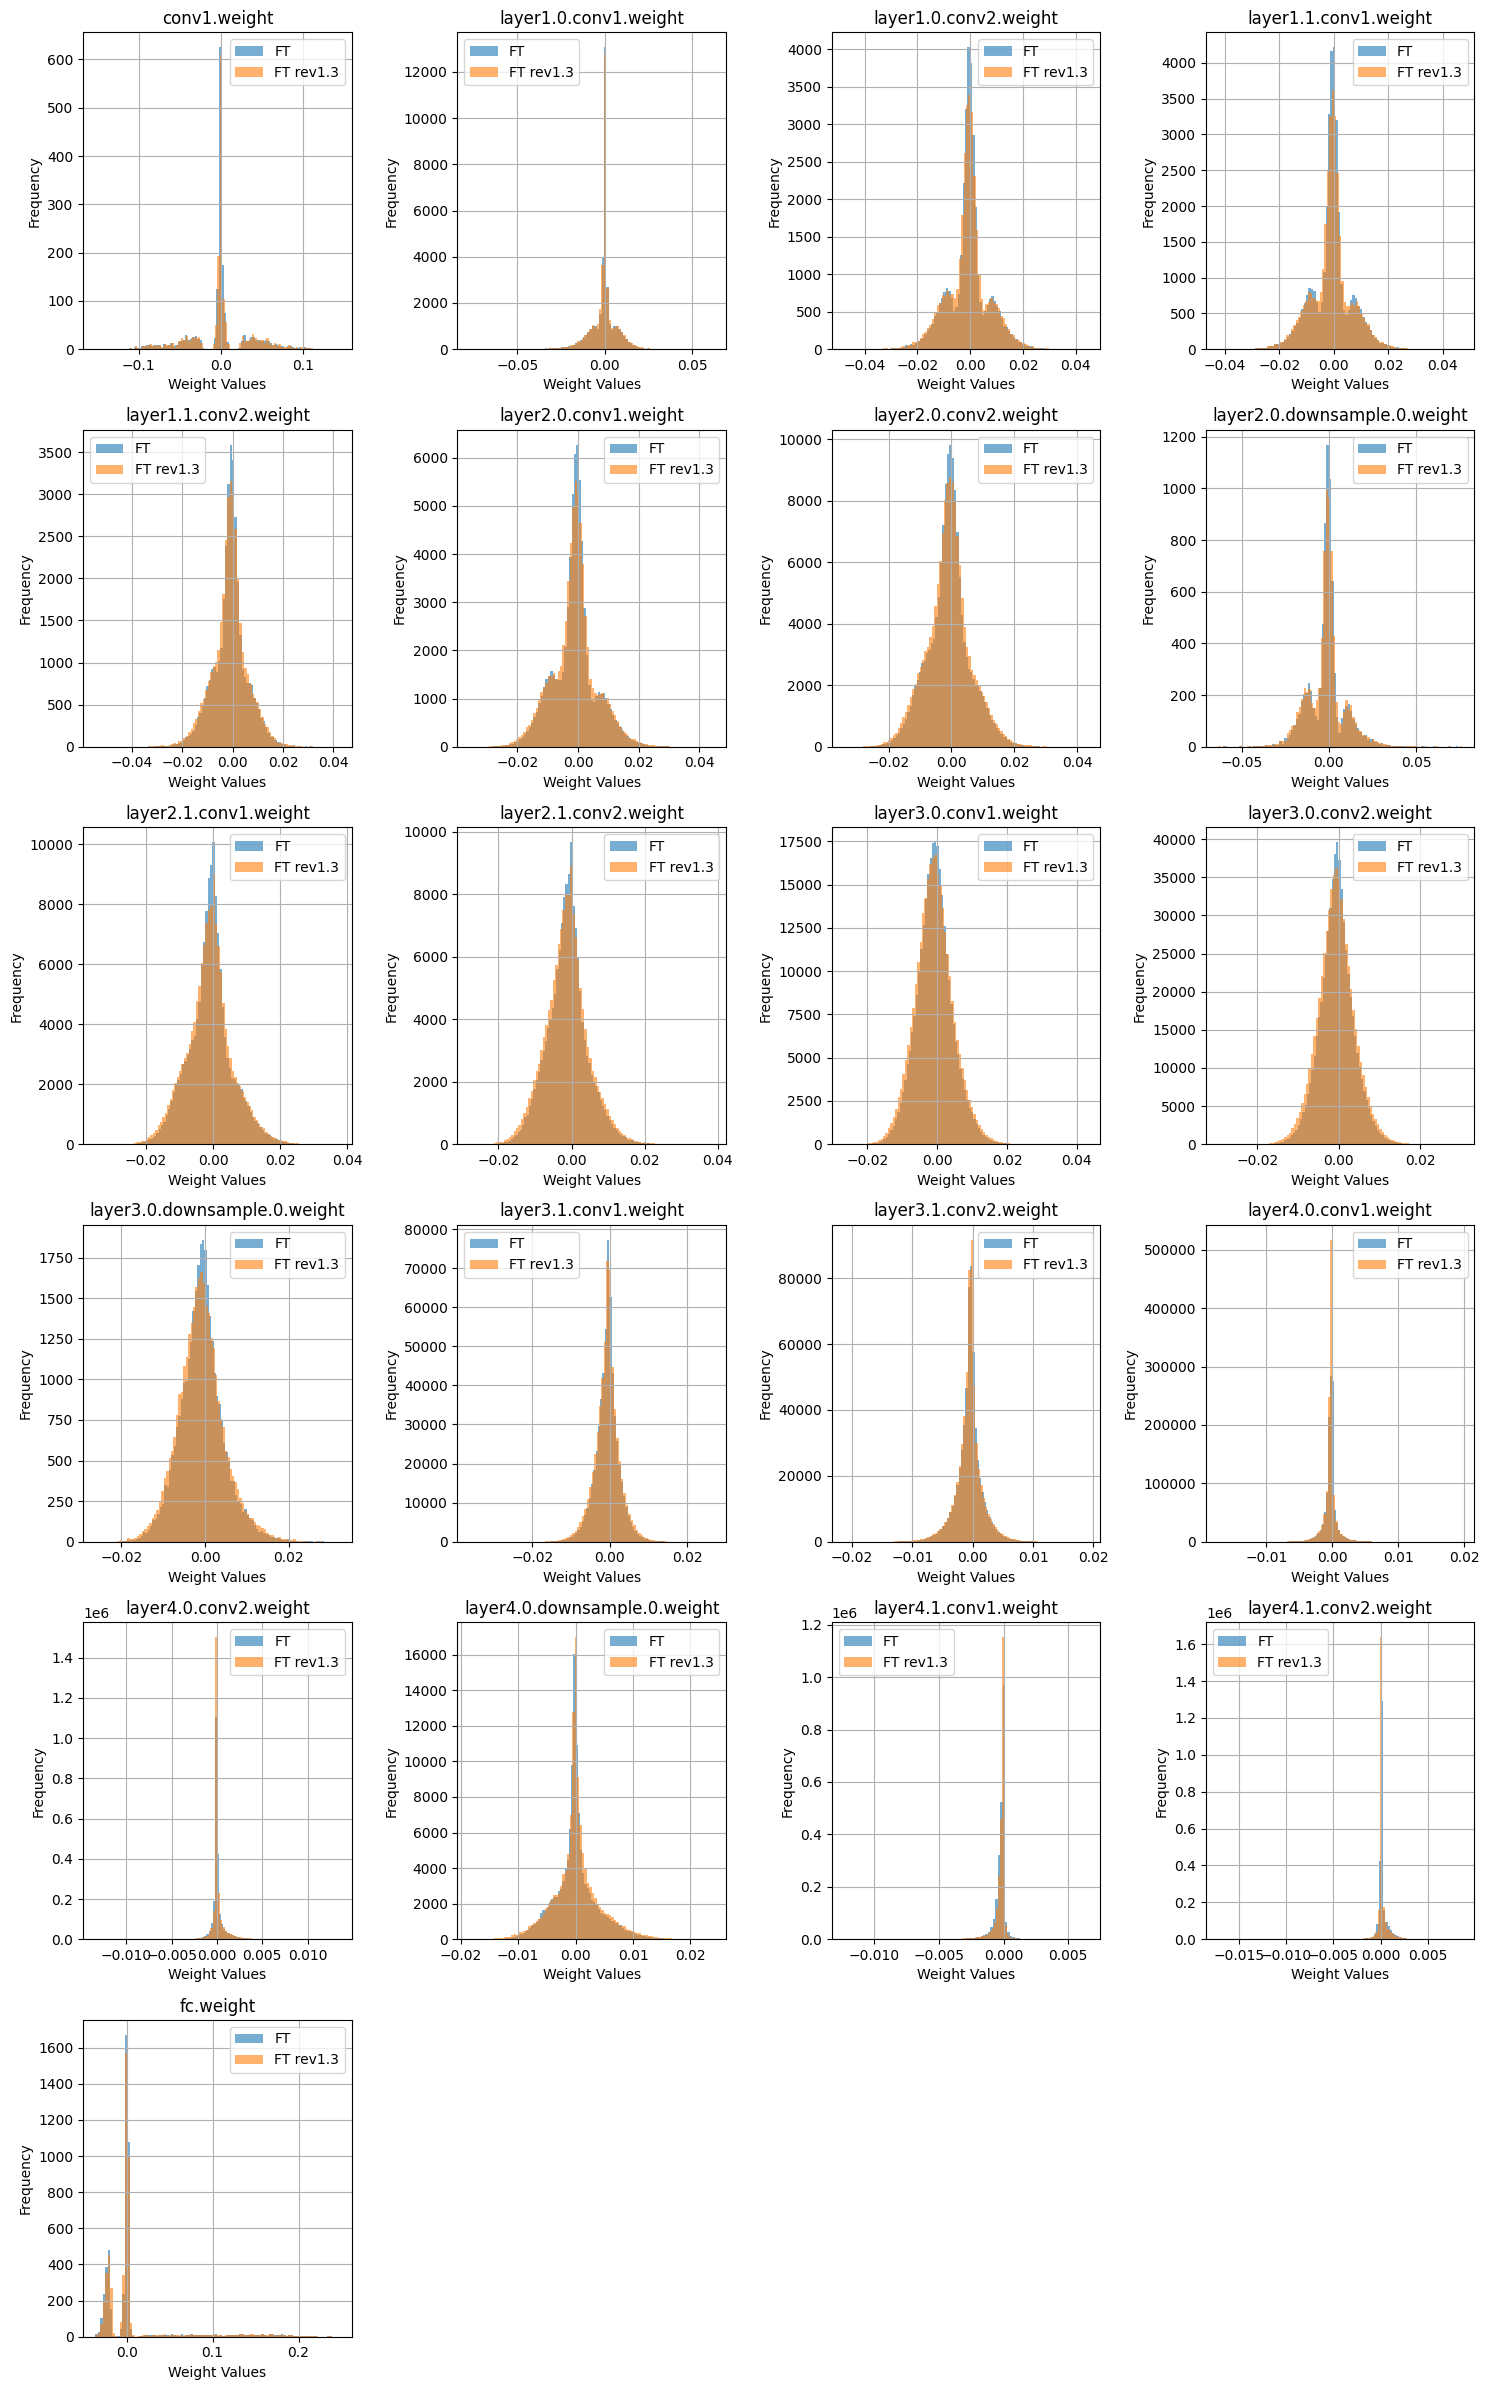

In [14]:
PlotModule.plot_weight_dist_two(
    models=[ft_model, ft3_model],
    model_names=['FT','FT rev1.3']
)

## lambda 별 plot

In [39]:
folder_name = 'Resnet18_p0.3'
model_ver = 'rev1.2'
dir_name = os.getcwd() + '/TestRun/'
folder_path = dir_name + folder_name
lambda_val = [ 0.0001, 1e-05, 1e-06]
models = []
model_names = []
for val in lambda_val:
    model_name = f'/FT_{model_ver}_{val}_30/best_model.pth'
    model_path = f'{folder_path}/{model_name}'
    model = torch.load(model_path, map_location='cpu')
    models.append(model)
    model_names.append(f'ft{model_ver}_model_{val}')

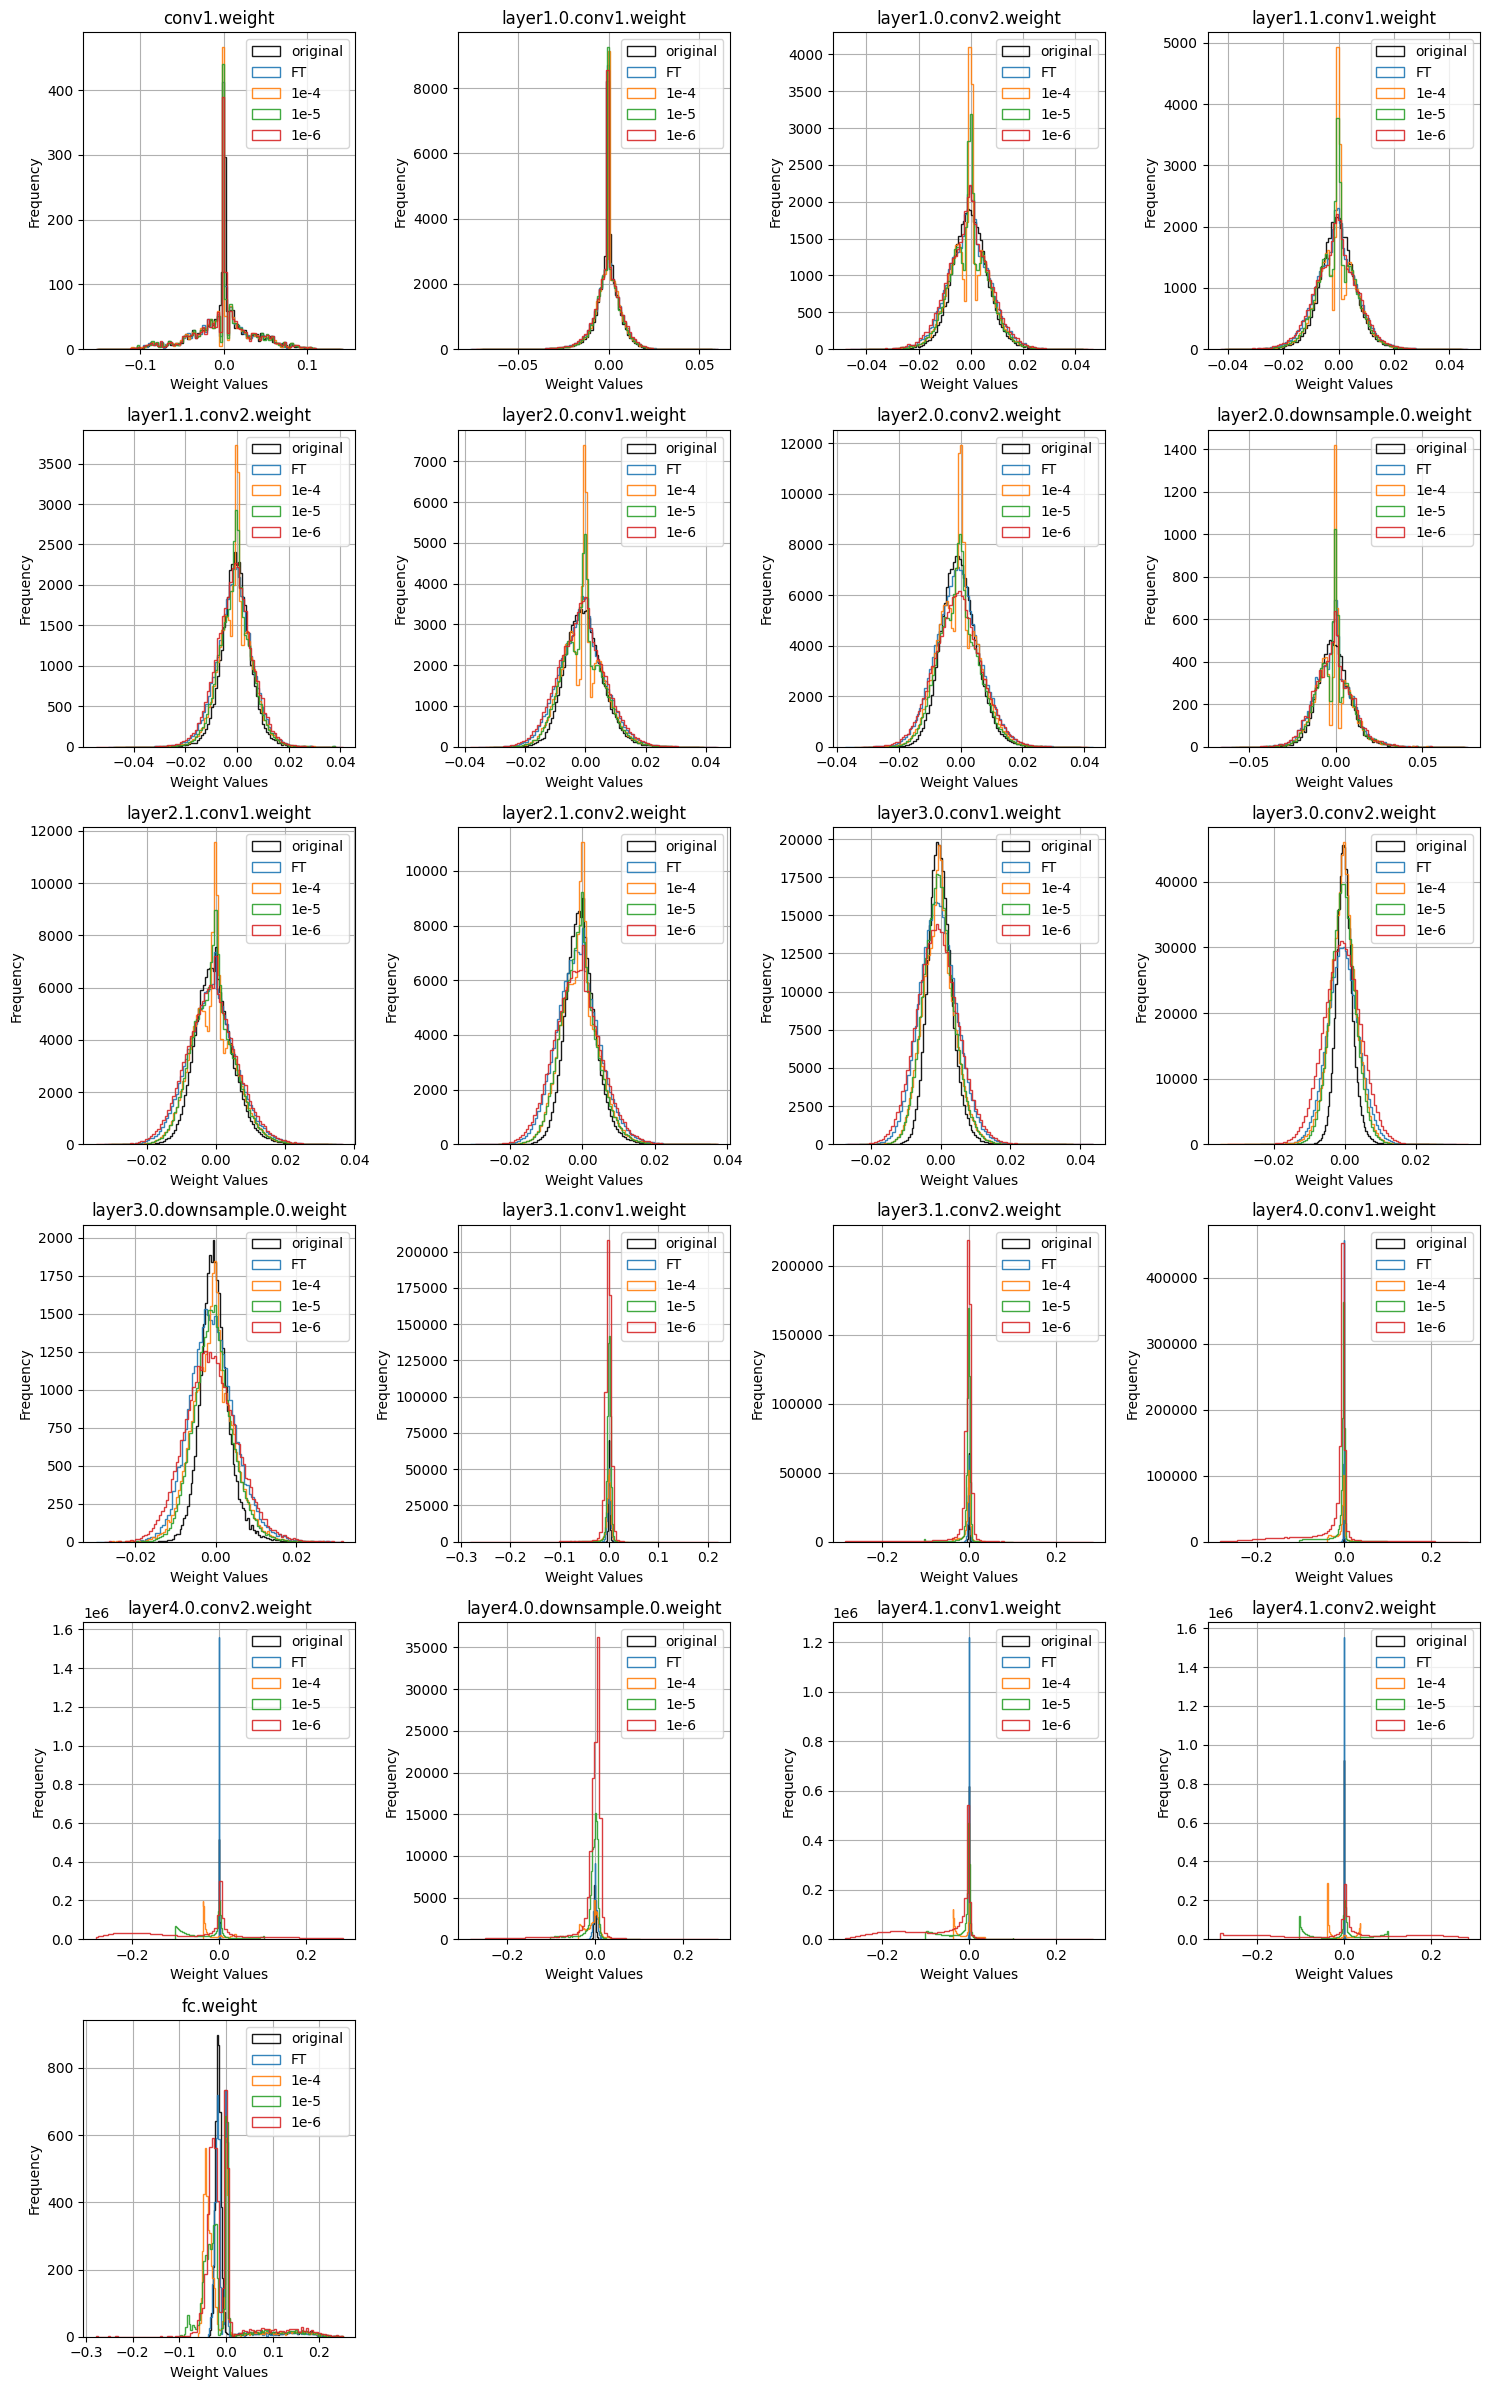

In [40]:
models.insert(0, ft_model)
models.insert(0, orig_model)

PlotModule.plot_weight_dist_multiple(
    models=models,
    model_names=['original', 'FT', '1e-4','1e-5','1e-6'],
)

Min Nonzero Gp (FC): 0.011895670555531979, Min Nonzero Gm (FC): 0.014217847026884556
Min Nonzero Gp (Conv): 1.1238326180773583e-07, Min Nonzero Gm (Conv): 9.361220776327173e-08


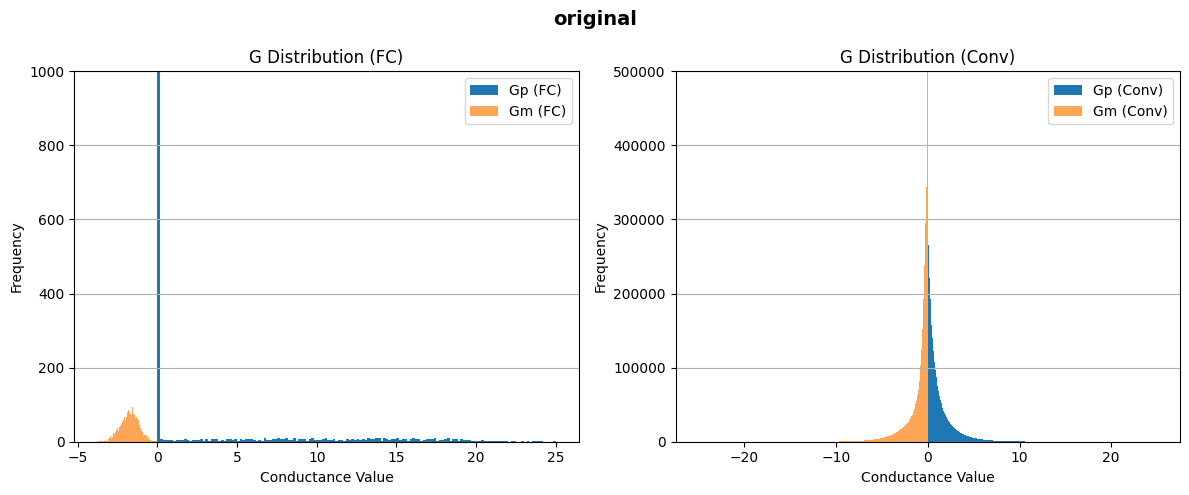

In [4]:
PlotModule.plot_G_dist(orig_model, 'original', gdc=True, ideal_io=True)

Min Nonzero Gp (FC): 6.728884181939065e-05, Min Nonzero Gm (FC): 0.00016386971401516348
Min Nonzero Gp (Conv): 9.108440018111311e-43, Min Nonzero Gm (Conv): 9.108440018111311e-43


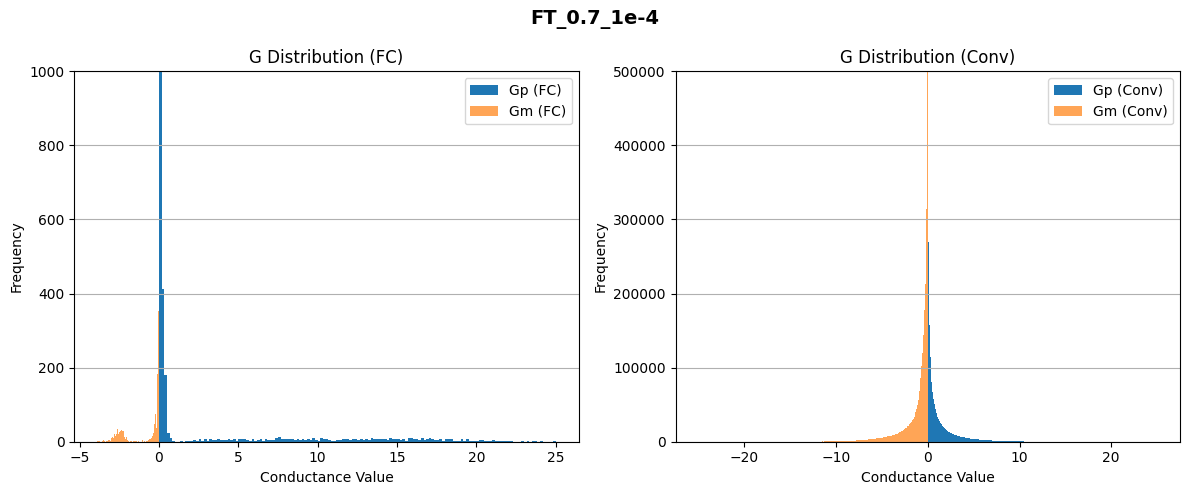

In [5]:
PlotModule.plot_G_dist(new_model, 'FT_0.7_1e-4', gdc=True, ideal_io=True)